In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 999

In [63]:
# read data
df = pd.read_table("workload/Na_work_Sub_13_Drive_2.dat",sep="\s+",low_memory=False)

In [64]:
df = df[1:]
df.head()

,VidTime,SimTime,FRAME_NUM,EXPERIMENT_TIME,GMT_S,GMT_MS,APPROX_DELAY,GAZE_DIR_QUAL_R,EYE_POS_R_X,EYE_POS_R_Y,EYE_POS_R_Z,GAZE_DIR_QUAL_L,EYE_POS_L_X,EYE_POS_L_Y,EYE_POS_L_Z,GAZE_DIR_QUAL,GAZE_HEADING,GAZE_PITCH,GAZE_ORIGIN_X,GAZE_ORIGIN_Y,GAZE_ORIGIN_Z,GAZE_DIRECTION_X,GAZE_DIRECTION_Y,GAZE_DIRECTION_Z,GAZE_DIRECTION_FILTERED_X,GAZE_DIRECTION_FILTERED_Y,GAZE_DIRECTION_FILTERED_Z,LEFT_GAZE_DIRECTION_X,LEFT_GAZE_DIRECTION_Y,LEFT_GAZE_DIRECTION_Z,LEFT_GAZE_DIRECTION_FILTERED_X,LEFT_GAZE_DIRECTION_FILTERED_Y,LEFT_GAZE_DIRECTION_FILTERED_Z,RIGHT_GAZE_DIRECTION_X,RIGHT_GAZE_DIRECTION_Y,RIGHT_GAZE_DIRECTION_Z,RIGHT_GAZE_DIRECTION_FILTERED_X,RIGHT_GAZE_DIRECTION_FILTERED_Y,RIGHT_GAZE_DIRECTION_FILTERED_Z,GAZE_ORIGIN_R_X,GAZE_ORIGIN_R_Y,GAZE_ORIGIN_R_Z,GAZE_ORIGIN_L_X,GAZE_ORIGIN_L_Y,GAZE_ORIGIN_L_Z,GAZE_OBJ_NAME,FILTERED_GAZE_OBJ_NAME,WORLD_INTERSECTION_X,WORLD_INTERSECTION_Y,WORLD_INTERSECTION_Z,INTERSECTION_SCREEN_X,INTERSECTION_SCREEN_Y,FILTERED_WORLD_INTERSECTION_X,FILTERED_WORLD_INTERSECTION_Y,FILTERED_WORLD_INTERSECTION_Z,FILTERED_INTERSECTION_SCREEN_X,FILTERED_INTERSECTION_SCREEN_Y,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadingError,HeadwayDistance,HeadwayTime,Lane,LaneOffset,RoadOffset,Steer,TailwayDistance,TailwayTime,Velocity,LatVelocity,VertVelocity,XPos,YPos,ZPos,Roll,Pitch,Yaw,EngineRPM,SlipFR,SlipFL,SlipRR,SlipRL,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11,User12,User13,User14,User15,User16,User17,FalseResponse,TrustResponse,EORFrameCount,Autonomous_Mode
1,0.016667,0.633308,190887,3186.757,-2147483648,0,0.787,0.0,0.022,-0.068,1.170,0.0,0.024,-0.016,1.170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506,-0.690,-0.518,0.0,0.0,0.0,0.597,-0.605,-0.527,0.0,0.0,0.0,0.029,-0.075,1.163,0.03,-0.025,1.163,CenterStack,Radio,0.614,-0.339,0.964,0.039,0.101,0.614,-0.339,0.964,0.039,0.101,0.286064,0.000091,0.0,0.0,4.0,269.999861,0.000001,10000.0,123475.007249,2.0,-0.000251,5.399749,0.005825,10000.0,123475.007249,0.080967,0.000019,-0.018885,1005.400024,1675.127197,-0.526098,-0.000029,-0.064030,-90.000117,477.478912,0.0,0.0,0.0,0.0,.,.,.,.,.,.,0.0,10000.0,10000.0,0.0,10000.0,10000.0,0.0,0.0,-0.278296,0.000061,0.0,.,.,.,0.0
2,0.033367,0.649974,190889,3186.791,-2147483648,0,0.787,0.0,0.022,-0.067,1.171,0.0,0.024,-0.016,1.170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508,-0.690,-0.515,0.0,0.0,0.0,0.600,-0.605,-0.524,0.0,0.0,0.0,0.029,-0.075,1.163,0.03,-0.024,1.163,CenterStack,Radio,0.614,-0.339,0.964,0.039,0.101,0.614,-0.339,0.964,0.039,0.101,0.279418,0.000092,0.0,0.0,4.0,269.999861,0.000002,10000.0,123475.007249,2.0,-0.000251,5.399749,0.005967,10000.0,123475.007249,0.085254,0.000020,-0.015451,1005.400024,1675.125854,-0.526383,-0.000031,-0.060939,-90.000104,477.478912,0.0,0.0,0.0,0.0,.,.,.,.,.,.,0.0,10000.0,10000.0,0.0,10000.0,10000.0,0.0,0.0,-0.459082,0.000076,0.0,.,.,.,0.0
3,0.050033,0.666640,190889,3186.791,-2147483648,0,0.787,0.0,0.022,-0.067,1.171,0.0,0.024,-0.016,1.170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508,-0.690,-0.515,0.0,0.0,0.0,0.600,-0.605,-0.524,0.0,0.0,0.0,0.029,-0.075,1.163,0.03,-0.024,1.163,CenterStack,Radio,0.614,-0.339,0.964,0.039,0.101,0.614,-0.339,0.964,0.039,0.101,0.269376,0.000093,0.0,0.0,4.0,269.999881,0.000002,10000.0,111619.277845,2.0,-0.000251,5.399749,0.006112,10000.0,111619.277845,0.089577,0.000022,-0.012629,1005.400024,1675.124268,-0.526631,-0.000033,-0.059343,-90.000097,477.478912,0.0,0.0,0.0,0.0,.,.,.,.,.,.,0.0,10000.0,10000.0,0.0,10000.0,10000.0,0.0,0.0,-0.674244,0.000051,0.0,.,.,.,0.0
4,0.066733,0.683306,190891,3186.824,-2147483648,0,0.787,0.0,0.022,-0.068,1.171,0.0,0.024,-0.016,1.171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.511,-0.688,-0.515,0.0,0.0,0.0,0.602,-0.603,-0.523,0.0,0.0,0.0,0.029,-0.075,1.164,0.03,-0.024,1.164,CenterStack,Radio,0.614,-0.339,0.964,0.039,0.101,0.614,-0.339,0.964,0.039,0.101,0.258855,0.000093,0.0,0.0,4.0,269.999881,0.000002,10000.0,111619.277845,2.0,-0.000251,5.399749,0.006234,10000.0,111619.277845,0.093214,0.000023

In [76]:
df['Lane'].unique()

array([ 2., -2.,  1., -1.,  0.])

In [65]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        continue

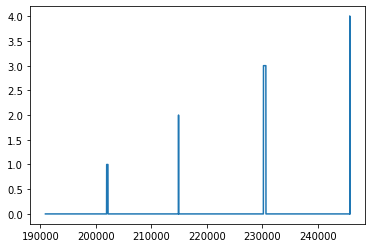

In [66]:
sces = df['User13']
times = df['FRAME_NUM']
plt.plot(times,sces)

In [67]:
# automation mode change from 0 to 1
end_point = df[df['User13'].diff()<=-1]
end_point = list(end_point['FRAME_NUM'])
end_point  

[202153, 214878, 230607, 245727]

In [68]:
# automation mode change from 1 to 0
tor_point = df[df['User13'].diff()>=1]
tor_point = list(tor_point['FRAME_NUM'])
tor_point

[201904, 214852, 230158, 245727]

In [69]:
# get the takeover period lists
takeover_list = []
for i in range(len(tor_point)):
    takeover_list.append([tor_point[i],end_point[i]])
takeover_list

[[201904, 202153], [214852, 214878], [230158, 230607], [245727, 245727]]

In [70]:
class SingleTakeover():
    def __init__(self,data,frames):
        self.start_frame = frames[0]
        self.end_frame = frames[1]
        self.frames = data[(data['FRAME_NUM']<=self.end_frame) & (data['FRAME_NUM']>=self.start_frame)] 
        self.tor_time = self.get_time_by_frameid(self.start_frame)
        self.aut_time = self.get_time_by_frameid(self.end_frame)
        self.headdistance = self.frames['HeadwayDistance']
        self.long_speed_arr = self.frames['Velocity']
        self.lat_speed_arr = self.frames['LatVelocity']
        self.steer_arr = self.frames['Steer']
        self.long_acc = self.frames['LonAccel']
        self.lat_acc = self.frames['LatAccel']
        self.headtime = self.frames['HeadwayTime']
        self.bicycle_velocity = self.frames['User7']
        self.bicycle_x = self.frames['User8']
        self.bicycle_y = self.frames['User9']
        self.car_velocity = self.frames['User10']
        self.car_x = self.frames['User11']
        self.car_y = self.frames['User12']
        self.x = self.frames['XPos']
        self.y = self.frames['YPos']
        self.lane = self.frames['Lane']
        
    def get_time_by_frameid(self,fid):
        return self.frames[self.frames['FRAME_NUM']==fid]['VidTime'].values[0]
    def get_time_by_endframe(self,fid):
        return self.get_time_by_frameid(fid) - self.tor_time       
    def calculate_tot_time(self):
        try:
            btot = self.frames[self.frames['Brake'].gt(9.9)]['VidTime'].values[0]
        except:
            btot = self.aut_time
        try:
            stot = self.frames[self.frames['Steer'].abs().gt(0.034889)]['VidTime'].values[0]
        except:
            stot = self.aut_time 
        try:
            gtot = self.frames[self.frames['Throttle'].gt(0.9)]['VidTime'].values[0]
        except:
            gtot = self.aut_time 
        btot = btot - self.tor_time
        stot = stot - self.tor_time
        gtot = gtot - self.tor_time
        return {'brake_tot':btot, 'steer_tot':stot, 'gas_tot':gtot,'min_tot':min(btot,stot,gtot)}

In [71]:
# scenario: 0
tt = SingleTakeover(df,takeover_list[0])

In [72]:
tt.lane

11002    2.0
11003    2.0
11004    2.0
11005    2.0
11006    2.0
11007    2.0
11008    2.0
11009    2.0
11010    2.0
11011    2.0
11012    2.0
11013    2.0
11014    2.0
11015    2.0
11016    2.0
11017    2.0
11018    2.0
11019    2.0
11020    2.0
11021    2.0
11022    2.0
11023    2.0
11024    2.0
11025    2.0
11026    2.0
11027    2.0
11028    2.0
11029    2.0
11030    2.0
11031    2.0
11032    2.0
11033    2.0
11034    2.0
11035    2.0
11036    2.0
11037    2.0
11038    2.0
11039    2.0
11040    2.0
11041    2.0
11042    2.0
11043    2.0
11044    2.0
11045    2.0
11046    2.0
11047    2.0
11048    2.0
11049    2.0
11050    2.0
11051    2.0
11052    2.0
11053    2.0
11054    2.0
11055    2.0
11056    2.0
11057    2.0
11058    2.0
11059    2.0
11060    2.0
11061    2.0
11062    2.0
11063    2.0
11064    2.0
11065    2.0
11066    2.0
11067    2.0
11068    2.0
11069    2.0
11070    2.0
11071    2.0
11072    2.0
11073    2.0
11074    2.0
11075    2.0
11076    2.0
11077    2.0
11078    2.0

In [61]:
headdis = np.array(tt.headdistance)
deltav = np.array(tt.long_speed_arr) - np.array(tt.bicycle_velocity)
vs = []
for v in deltav:
    if v > 0:
        vs.append(v)
    else:
        vs.append(0.0001)
velocity = np.array(vs)
minttc = min(np.divide(headdis,velocity))
minttc

1.5211577215515701

In [37]:
tt.calculate_tot_time()

{'brake_tot': 4.170999999999992,
 'steer_tot': 2.8700000000000045,
 'gas_tot': 4.170999999999992,
 'min_tot': 2.8700000000000045}

In [25]:
headtime = np.array(tt.headtime)
min(headtime)

666.666667

In [26]:
# second1 = 125521
# takeover1_start = 131085 - bycycle driving ahead
# takeover1_end = 131747
list(wdf[wdf['FRAME_NUM']>131085]['Steer'])

NameError: name 'wdf' is not defined

In [5]:
t1 = wdf[(wdf['FRAME_NUM']>131000) & (wdf['FRAME_NUM']<132000)]

In [98]:
t1_f = t1['FRAME_NUM']
t1_x = t1['XPos']
t1_y = t1['YPos']

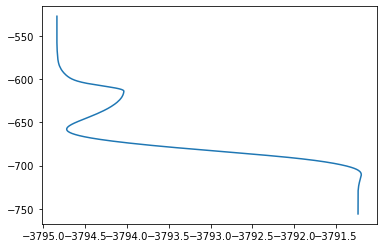

In [99]:
plt.plot(t1_x,-t1_y)

In [106]:
# second2 = 140142
# takeover1_start = 146912 - working zone ahead
# takeover1_end = 147647
t2 = wdf[(wdf['FRAME_NUM']>146012) & (wdf['FRAME_NUM']<147847)]

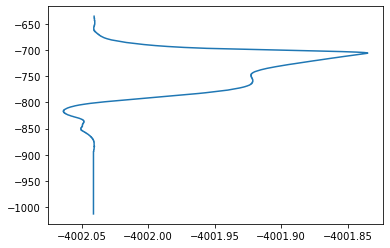

In [108]:
t2_f = t2['FRAME_NUM']
t2_x = t2['XPos']
t2_y = t2['YPos']
plt.plot(t2_x,t2_y)

In [140]:
# second2 = 152445
# takeover1_start = 157721 - stationary car ahead
# takeover1_end = 158808
t3 = wdf[(wdf['FRAME_NUM']>157500) & (wdf['FRAME_NUM']<158900)]

,VidTime,SimTime,FRAME_NUM,EXPERIMENT_TIME,GMT_S,GMT_MS,APPROX_DELAY,GAZE_DIR_QUAL_R,EYE_POS_R_X,EYE_POS_R_Y,EYE_POS_R_Z,GAZE_DIR_QUAL_L,EYE_POS_L_X,EYE_POS_L_Y,EYE_POS_L_Z,GAZE_DIR_QUAL,GAZE_HEADING,GAZE_PITCH,GAZE_ORIGIN_X,GAZE_ORIGIN_Y,GAZE_ORIGIN_Z,GAZE_DIRECTION_X,GAZE_DIRECTION_Y,GAZE_DIRECTION_Z,GAZE_DIRECTION_FILTERED_X,GAZE_DIRECTION_FILTERED_Y,GAZE_DIRECTION_FILTERED_Z,LEFT_GAZE_DIRECTION_X,LEFT_GAZE_DIRECTION_Y,LEFT_GAZE_DIRECTION_Z,LEFT_GAZE_DIRECTION_FILTERED_X,LEFT_GAZE_DIRECTION_FILTERED_Y,LEFT_GAZE_DIRECTION_FILTERED_Z,RIGHT_GAZE_DIRECTION_X,RIGHT_GAZE_DIRECTION_Y,RIGHT_GAZE_DIRECTION_Z,RIGHT_GAZE_DIRECTION_FILTERED_X,RIGHT_GAZE_DIRECTION_FILTERED_Y,RIGHT_GAZE_DIRECTION_FILTERED_Z,GAZE_ORIGIN_R_X,GAZE_ORIGIN_R_Y,GAZE_ORIGIN_R_Z,GAZE_ORIGIN_L_X,GAZE_ORIGIN_L_Y,GAZE_ORIGIN_L_Z,GAZE_OBJ_NAME,FILTERED_GAZE_OBJ_NAME,WORLD_INTERSECTION_X,WORLD_INTERSECTION_Y,WORLD_INTERSECTION_Z,INTERSECTION_SCREEN_X,INTERSECTION_SCREEN_Y,FILTERED_WORLD_INTERSECTION_X,FILTERED_WORLD_INTERSECTION_Y,FILTERED_WORLD_INTERSECTION_Z,FILTERED_INTERSECTION_SCREEN_X,FILTERED_INTERSECTION_SCREEN_Y,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadingError,HeadwayDistance,HeadwayTime,Lane,LaneOffset,RoadOffset,Steer,TailwayDistance,TailwayTime,Velocity,LatVelocity,VertVelocity,XPos,YPos,ZPos,Roll,Pitch,Yaw,EngineRPM,SlipFR,SlipFL,SlipRR,SlipRL,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11,User12,User13,User14,User15,User16,User17,FalseResponse,TrustResponse,EORFrameCount,Autonomous_Mode
43147,719.836,689.006,157502,2630.576,-2147483648,0,0.737,0.000,0.011,-0.075,1.188,0.000,-0.045,-0.036,1.159,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.791,0.451,-0.414,0.000,0.000,0.000,0.842,0.355,-0.405,0.000,0.000,0.000,0.021,-0.071,1.182,-0.035,-0.030,1.153,Windshield,RightCenter,3.971,-2.964,1.634,628.667,423.310,3.971,-2.964,1.634,628.667,423.310,0.000001,-0.000000,0.0,0.0,4.0,90.000003,0.000002,10000.0,666.666667,-2.0,-0.000010,-5.399989,-0.000000,10000.0,666.666667,14.999990,0.000000,-0.016869,-4001.949951,1233.857666,-0.531406,0.000000,-0.064434,89.999988,1592.986572,0.005749,0.005749,0.000000,0.000000,.,.,.,.,.,.,0.0,100000.0,100000.0,0.0,10000.0,10000.0,0.0,3.0,0.000021,0.000000,0.0,.,.,.,1.0
43148,719.852,689.022,157504,2630.609,-2147483648,0,0.722,0.000,-0.049,-0.026,1.154,0.004,0.018,-0.016,1.187,0.004,0.240,0.038,0.030,-0.018,1.187,0.971,-0.238,0.038,0.971,-0.238,0.038,0.971,-0.238,0.038,0.971,-0.238,0.038,0.969,-0.242,0.056,0.000,0.000,0.000,-0.037,-0.030,1.154,0.030,-0.018,1.187,Windshield,CenterChannel,4.981,-1.232,1.381,1192.083,524.210,4.981,-1.232,1.381,1192.083,524.210,0.000001,-0.000000,0.0,0.0,4.0,90.000003,0.000002,10000.0,666.666667,-2.0,-0.000009,-5.399990,-0.000000,10000.0,666.666667,14.999990,0.000000,-0.016869,-4001.949951,1234.107666,-0.531406,0.000000,-0.064434,89.999988,1592.986450,0.005749,0.005749,0.000000,0.000000,.,.,.,.,.,.,0.0,100000.0,100000.0,0.0,10000.0,10000.0,0.0,3.0,0.000011,0.000000,0.0,.,.,.,1.0
43149,719.869,689.039,157506,2630.643,-2147483648,0,0.703,0.000,-0.046,-0.023,1.159,0.126,0.018,-0.022,1.195,0.126,0.396,-0.344,0.029,-0.026,1.190,0.868,-0.363,-0.338,0.868,-0.363,-0.338,0.868,-0.363,-0.338,0.868,-0.363,-0.338,0.798,-0.505,-0.330,0.000,0.000,0.000,-0.037,-0.029,1.154,0.029,-0.026,1.190,Windshield,CenterChannel,4.981,-1.232,1.381,1192.083,524.210,4.981,-1.232,1.381,1192.083,524.210,0.000001,-0.000000,0.0,0.0,4.0,90.000003,0.000002,10000.0,666.666667,-2.0,-0.000009,-5.399990,-0.000000,10000.0,666.666667,14.999990,0.000000,-0.016869,-4001.949951,1234.357666,-0.531406,0.000000,-0.064434,89.999988,1592.986450,0.005749,0.005749,0.000000,0.000000,.,.,.,.,.,.,0.0,100000.0,100000.0,0.0,10000.0,10000.0,0.0,3.0,0.000005,0.000000,0.0,.,.,.,1.0
43150,719.886,689.056,157508,2630.676,-2147483648,0,0.688,-0.992,0.009,-0.063,1.187,0.010,0.018,-0.022,1.194,0.010,0.454,-0.260,0.029,-0.027,1.190,0.869,-0.423,-0.257,0.009,-0.004,-0.003,0.869,-0.423,-0.257,0.869,-0.423,-0.257,

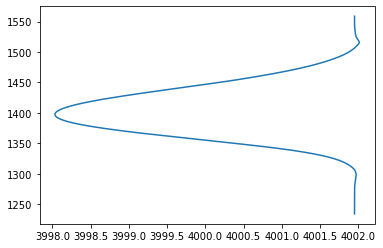

In [126]:
t3_f = t3['FRAME_NUM']
t3_x = t3['XPos']
t3_y = t3['YPos']
plt.plot(-t3_x,t3_y)

In [137]:
# second4 = 168648
# takeover1_start = 174436 - high curvature
# takeover1_end = 175846
t4 = wdf[(wdf['FRAME_NUM']>174000) & (wdf['FRAME_NUM']<175846)]

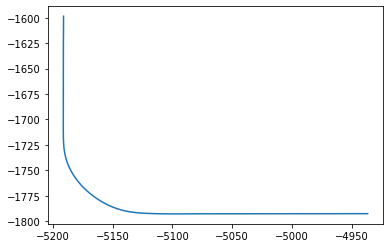

In [138]:
t4_f = t4['FRAME_NUM']
t4_x = t4['XPos']
t4_y = t4['YPos']
plt.plot(t4_x,-t4_y)